In [1]:
#################################
#                                
#  Word to Vector Clusstering
#  Program
#
#  Note: The program uses pandas to read in data. But I think there could be a better way.
#        It is important to have the data read in as unicode 
#        Running this program will require the .xlsx dataframes as clustering input and also 
#        .txt files for the neutral, positive, and negative input words.         
#
#################################
import pandas as pd
import copy
from gensim.models.word2vec import Word2Vec
import numpy as np

In [3]:
##############################
#
#  Read in all of the data as a pandas dataframe. 
#
##############################
df10 = pd.read_excel('HN-Extortion.xlsx')
df11 = pd.read_excel('HN-Killing.xlsx')
df12 = pd.read_excel('HN-Pandillas.xlsx')


In [4]:
#################
#
#  Make strings out of tweets and then split them into individual words
#
#################
df10_String = []
for i in range(len(df10)): 
    df10_String.append(df10.Contents[i])
    
df11_String = []
for i in range(len(df11)): 
    df11_String.append(df11.Contents[i])
    
df12_String = []
for i in range(len(df12)): 
    df12_String.append(df12.Contents[i])
################################
#
#  Tokenizing
#
################################    
df10_String1 = copy.copy(df10_String)
df10_String1 = [z.lower().replace('\n','').split() for z in df10_String1]

df11_String1 = copy.copy(df11_String)
df11_String1 = [z.lower().replace('\n','').split() for z in df11_String1]

df12_String1 = copy.copy(df12_String)
df12_String1 = [z.lower().replace('\n','').split() for z in df12_String1]


In [5]:

# The dimensionality of the Word Vector
n_dim = 300
# Initialize model and build vocab
HN_w2v = Word2Vec(size=n_dim, min_count=10)
# With Gensim. The model can be trained on more than one dataset.
# They don't all have to be concatenated or put into memory
HN_w2v.build_vocab(df10_String1)
HN_w2v.build_vocab(df11_String1)
HN_w2v.build_vocab(df12_String1)

In [6]:
#############################################
#
#  Read the words to be clusterred
#
#############################################

with open('Neutral Words.txt', 'r') as infile:
    Neutral_Words = infile.readlines()
with open('Positive Words.txt', 'r') as infile:
    Positive_Words = infile.readlines()
with open('Negative words.txt', 'r') as infile:
    Negative_Words = infile.readlines()

In [7]:
#######################################################
#
# A function to get the word vectors of te input words
#
#######################################################
def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(HN_w2v[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values

In [8]:
##################
#
#  Running the previous Function
#
##################
Neutral_Words = getWordVecs(Neutral_Words)
Positive_Words = getWordVecs(Positive_Words)
Negative_Words = getWordVecs(Negative_Words)


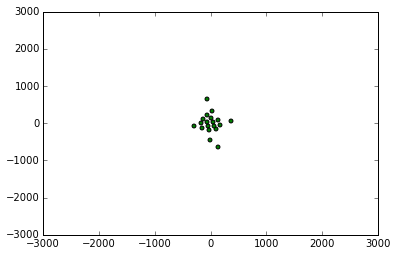

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# TSNE Reduces the dimension of the word vectors from 300 to 2
ts = TSNE(2)

# Concatenate the Word Array to be plotted
reduced_vecs = ts.fit_transform(np.concatenate((Neutral_Words, Negative_Words, Positive_Words)))

# Color the word vector
# 
for x in reduced_vecs:
    if i < len(Neutral_Words):
        #Neutral Words colored blue
        color = 'b'
    elif i >= len(Neutral_Words) and i < (len(Neutral_Words) + len(Negative_Words)):
        #Negative words colored red
        color = 'r'
    else:
        #Positive words colored green
        color = 'g'
    

#plot the graph
#plt.plot(reduced_vecs[range(len(reduced_vecs)),0], reduced_vecs[range(len(reduced_vecs)),1], marker='o', color=color, markersize=8)

plt.xlim(-3000, 3000)
plt.ylim(-3000, 3000)
plt.show()

In [26]:
reduced_vecs[0]

array([-277.6858229 ,   11.29059253])

In [27]:
XaveragePositive = 0
YaveragePositive = 0
XaveragePositive = 0
YaveragePositive = 0 
XaveragePositive = 0
YaveragePositive = 0
Xaverage = reduced_vecs[]+Xaverage

SyntaxError: invalid syntax (<ipython-input-27-9b847b31337e>, line 7)

[(u'escuchar', 0.18197637796401978),
 (u'olimpia', 0.1702394187450409),
 (u'ba\xf1o', 0.16241493821144104),
 (u'deseo', 0.15305890142917633),
 (u'encuentran', 0.15255489945411682),
 (u'vivo', 0.15216267108917236),
 (u'campa\xf1a', 0.14838345348834991),
 (u'organizado', 0.14246472716331482),
 (u'luis', 0.1421860158443451),
 (u'h\xe9roe', 0.14102475345134735)]

IOError: [Errno 2] No such file or directory: 'Neutral Words.txt'

NameError: global name 'HN_w2v' is not defined

ValueError: could not convert string to float: asesinato


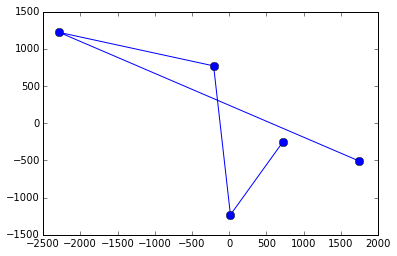

IndexError: index 9324 is out of bounds for axis 0 with size 5

IndexError: index 9324 is out of bounds for axis 0 with size 5

IndexError: index 5 is out of bounds for axis 0 with size 5